# Keras

Keras on the MNIST data set again, this time using a Convolutional Neural Network that's better suited for image processing. CNN's are less sensitive to where in the image the pattern is.

Importing:

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

Load up raw data set:

In [2]:
# load up data and split to train/test
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

Treating the data as 2D images of 28x28 pixels instead of a flattened stream of 784 pixels, need to shape it accordingly. Depending on the data format Keras is set up for, this may be 1x28x28 or 28x28x1 (the "1" indicates a single color channel, as this is just grayscale.

In [3]:
from tensorflow.keras import backend as K

# if organized by color channels first
if K.image_data_format() == 'channels_first':
    
    # reshape data
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
# convert to floating point
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# transform into number between0 and 1
train_images /= 255
test_images /= 255

Convert our train and test labels to be categorical in one-hot format:

In [4]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

Print out one of the training images with its label:

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


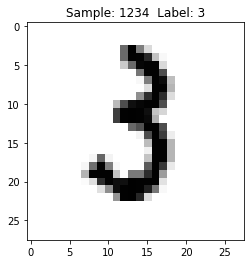

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

Start with a 2D convolution of the image - it's set up to take 32 windows, or "filters", of each image, each filter being 3x3 in size.

Then run a second convolution on top of that with 64 3x3 windows - this topology is just what comes recommended within Keras's own examples. 

Apply a MaxPooling2D layer that takes the maximum of each 2x2 result to distill the results down into something more manageable.

A dropout filter is then applied to prevent overfitting.

Flatten the 2D layer have at this stage into a 1D layer. So now there is a traditional multi-layer perceptron that can be feed that into a hidden, flat layer of 128 units.

Apply dropout again to further prevent overfitting.

Feed that into our final 10 units where softmax is applied to choose our category of 0-9.

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))

# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))

# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout to avoid overfitting
model.add(Dropout(0.25))

# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())

# A hidden layer to learn with
model.add(Dense(128, activation='relu'))

# Another dropout
model.add(Dropout(0.5))

# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

Check the model description:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

With multiple categorization, categorical_crossentropy is still the right loss function to use. With the Adam optimizer.

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Train our model in batches of 32.

In [9]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 - 126s - loss: 0.2102 - accuracy: 0.9355 - val_loss: 0.0586 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 - 131s - loss: 0.0914 - accuracy: 0.9728 - val_loss: 0.0395 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 - 119s - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.0342 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 - 95s - loss: 0.0566 - accuracy: 0.9827 - val_loss: 0.0350 - val_accuracy: 0.9891
Epoch 5/10
1875/1875 - 102s - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.0346 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 - 105s - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0305 - val_accuracy: 0.9921
Epoch 7/10
1875/1875 - 99s - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0313 - val_accuracy: 0.9925
Epoch 8/10
1875/1875 - 98s - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 9/10
1875/1875 - 101s - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0326 - val_accuracy: 0.9922
Epoch 10/10
1875/1875 - 105s - loss: 0.0326 - accuracy: 0.9896 - va

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.033562399446964264
Test accuracy: 0.9919999837875366


Over 99% accuracy with just 10 epochs! 

It came at a significant cost in terms of computing power, but when you start distributing things over multiple computers each with multiple GPU's, that cost starts to feel less bad.